## 1. Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## 2. Load titanic dataset

In [4]:
t = sns.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
t.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
t.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
t.shape

(891, 15)

In [9]:
t.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# checking missing values
t.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3. Dealing with NaN

#####  If we see deck column has maximum entries are missing, age column has 177 entries column missing and embarked and embarked_towm has each 2 values are missing.

In [13]:
# will drop the deck column
t.drop(['deck'],axis=1,inplace=True)
t[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


<AxesSubplot:xlabel='age', ylabel='Density'>

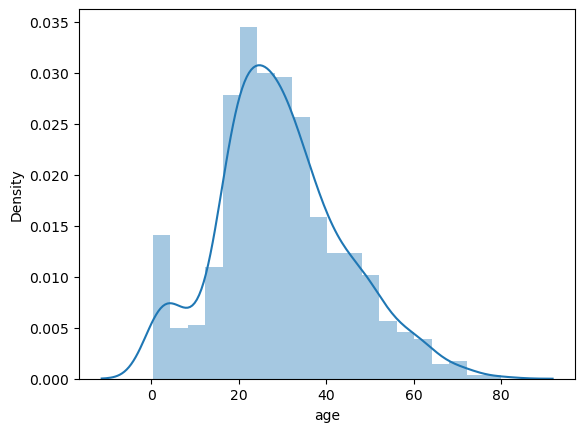

In [14]:
sns.distplot(t['age'])

We see above chart is skewed to right so we can fill nan values of age with median

In [76]:
t['age'].fillna(t['age'].mean(),inplace=True)

In [77]:
# embark_town and embarked will be filled with backward filling method
t['embarked'].fillna(method='backfill',inplace=True)
t['embark_town'].fillna(method='backfill',inplace=True)

In [78]:
t.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

All the missing values are setteled. So we can proceed further.

## 4. Data visulization and plotting

##### sex

In [79]:
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [80]:
sex_count = t.sex.value_counts()
sex_count

male      577
female    314
Name: sex, dtype: int64

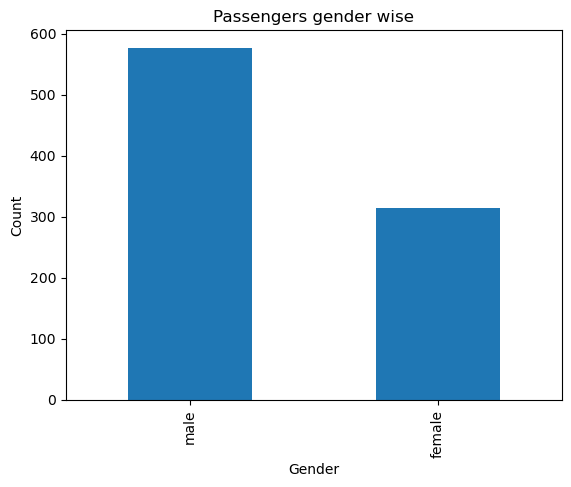

In [81]:
sex_count.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Passengers gender wise')
plt.show()

In [82]:
male_count = sex_count[0]
male_count

577

In [83]:
female_count = sex_count[1]
female_count

314

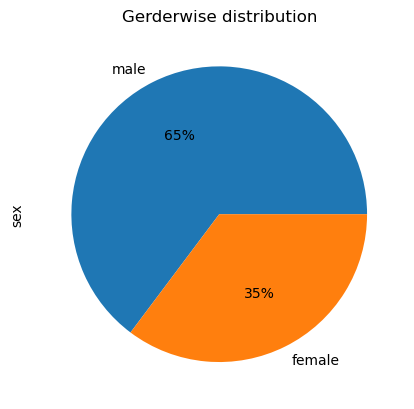

In [84]:
sex_count.plot(kind='pie',autopct='%.f%%')
plt.title('Gerderwise distribution')
plt.show()

In this male passenger percentage is more than the female passenger percentage i.e 65%. 

#### Age

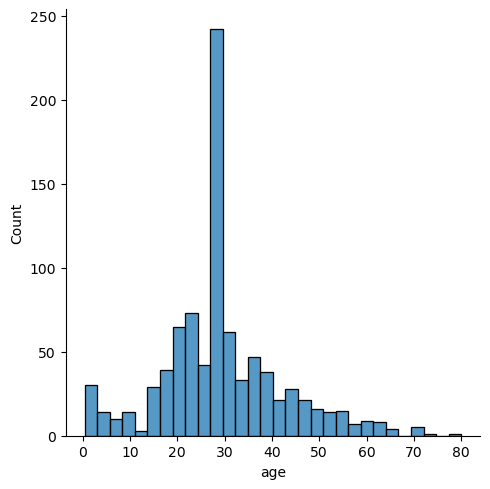

In [85]:
sns.displot(data=t,x='age')

Passengers age varies from 0 to 80

<AxesSubplot:xlabel='age', ylabel='Density'>

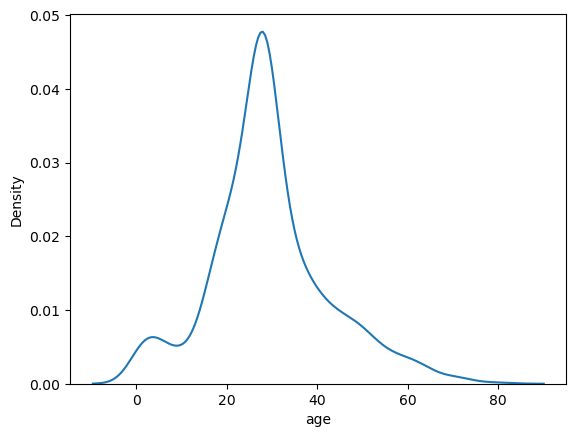

In [86]:
sns.kdeplot(t['age'])

#### Class

<AxesSubplot:xlabel='class', ylabel='count'>

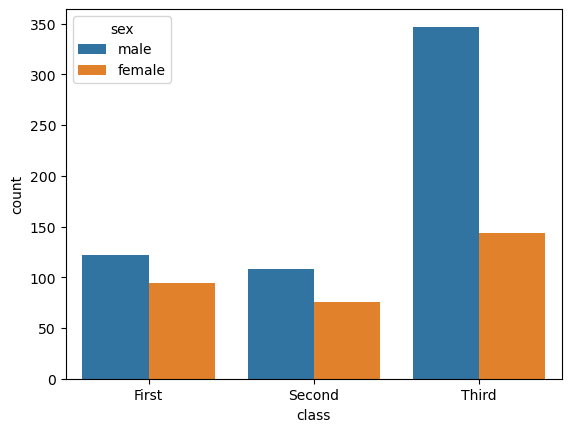

In [87]:
sns.countplot(x='class',hue='sex',data=t)

In the Third class more number of male passengers are booked their ticket.

In [65]:
pclass_count = t.pclass.value_counts()
pclass_count

3    491
1    216
2    184
Name: pclass, dtype: int64

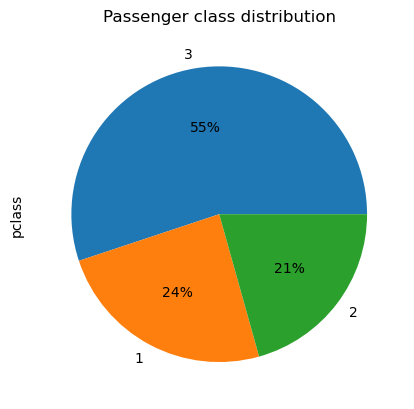

In [88]:
pclass_count.plot(kind='pie',autopct='%.f%%')
plt.title('Passenger class distribution')
plt.show()

More passengers are in third as compared to others

In [90]:
t.groupby('pclass').sex.value_counts()

pclass  sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: sex, dtype: int64

In [91]:
total_passenger = t.shape[0]
total_passenger

891

<AxesSubplot:xlabel='class', ylabel='fare'>

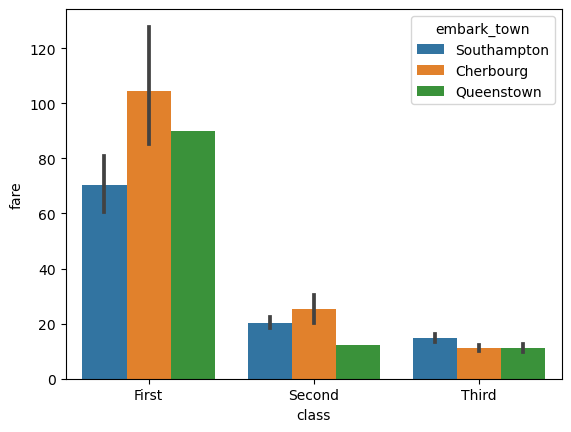

In [99]:
sns.barplot(data=t,x='class',y='fare',hue='embark_town')

<AxesSubplot:xlabel='class', ylabel='count'>

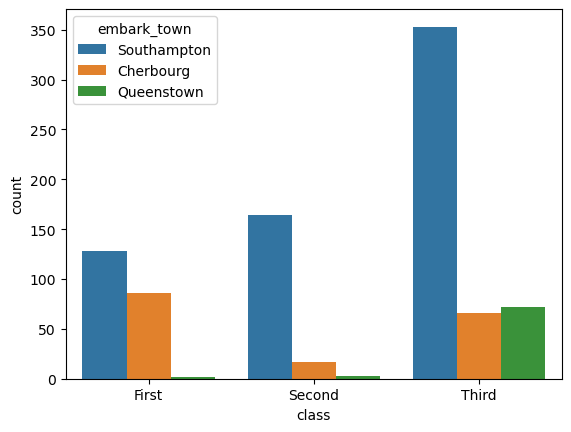

In [100]:
sns.countplot(data=t,x='class',hue='embark_town')

In comparison all class passengers from southampton passengers are more in all classes.
In first and second class passengers from queenstown are very less.

##### fare

In [101]:
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='fare'>

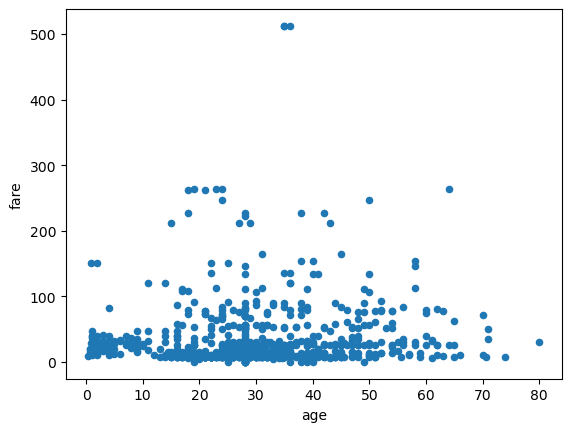

In [107]:
t.plot(kind='scatter',x='age',y='fare')

<AxesSubplot:xlabel='class', ylabel='fare'>

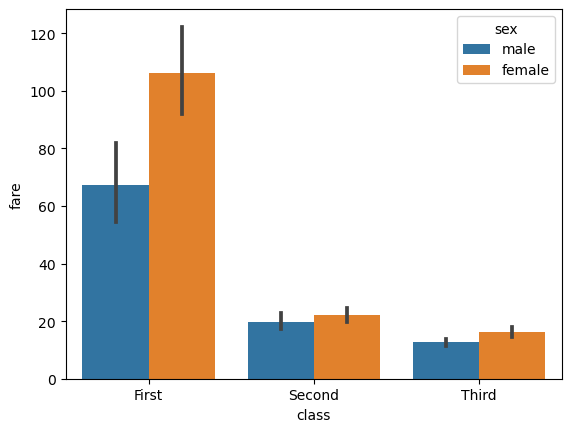

In [112]:
sns.barplot(data=t,x='class',y='fare',hue='sex')

In first class female have more compare to male

<AxesSubplot:xlabel='class', ylabel='fare'>

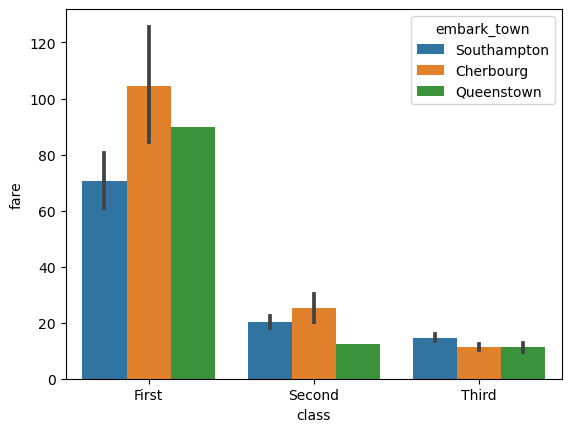

In [113]:
sns.barplot(data=t,x='class',y='fare',hue='embark_town')

Passengers from cherbourg in first class and second class category had given higher fare other two town.

<AxesSubplot:xlabel='sex', ylabel='fare'>

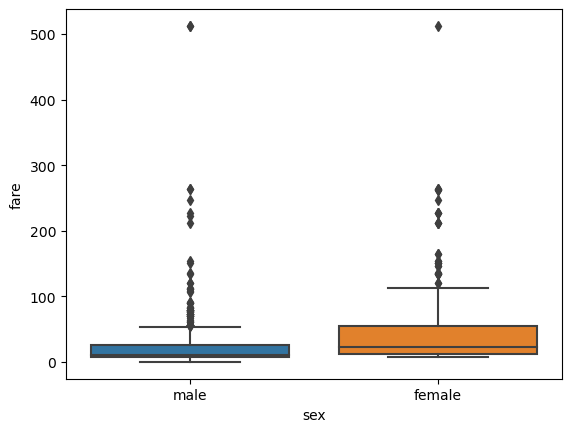

In [115]:
sns.boxplot(data=t,x='sex',y='fare')

<AxesSubplot:xlabel='class', ylabel='fare'>

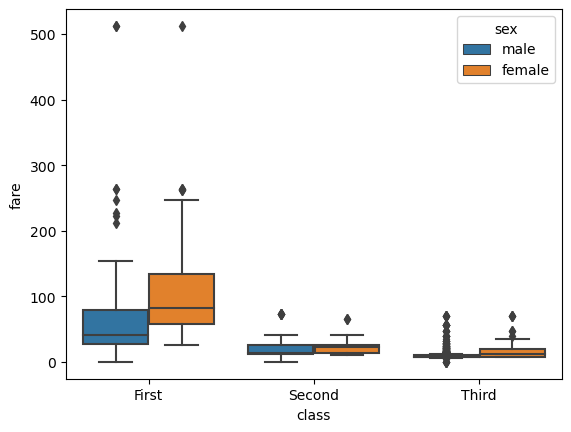

In [116]:
sns.boxplot(data=t,x='class',y='fare',hue='sex')

##### Survived

In [118]:
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


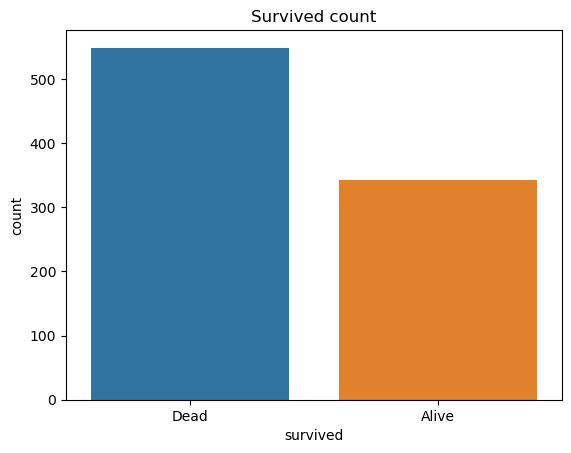

In [120]:
sns.countplot(data=t,x='survived')
plt.xticks([0,1],['Dead','Alive'])
plt.title('Survived count')
plt.show()

In [125]:
t.groupby(['survived','sex'])

In [129]:
t[['sex','survived']].groupby(['sex']).value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
dtype: int64

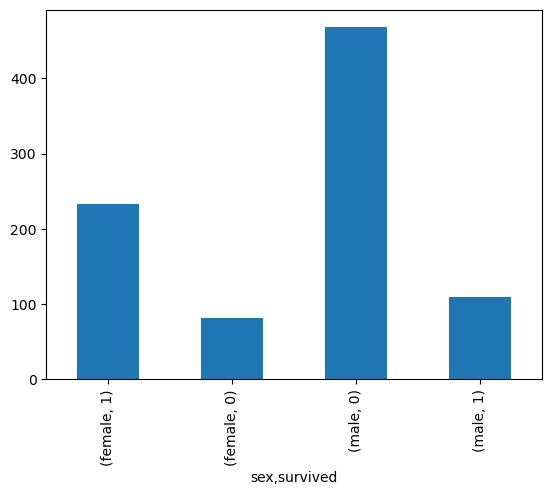

In [132]:
t[['sex','survived']].groupby(['sex']).value_counts().plot(kind='bar')
plt.show()

In [137]:
t[['sex','survived']].groupby(['sex']).mean().value_counts()

survived
0.188908    1
0.742038    1
dtype: int64

Survival rate in women passenger is higher than the men.

In [139]:
# Survival rate by passenger class

In [142]:
t[['class','survived']].groupby(['class']).value_counts()

class   survived
First   1           136
        0            80
Second  0            97
        1            87
Third   0           372
        1           119
dtype: int64

In [143]:
t_survived_class = t[['class','survived']].groupby(['class']).value_counts()

<AxesSubplot:xlabel='survived', ylabel='count'>

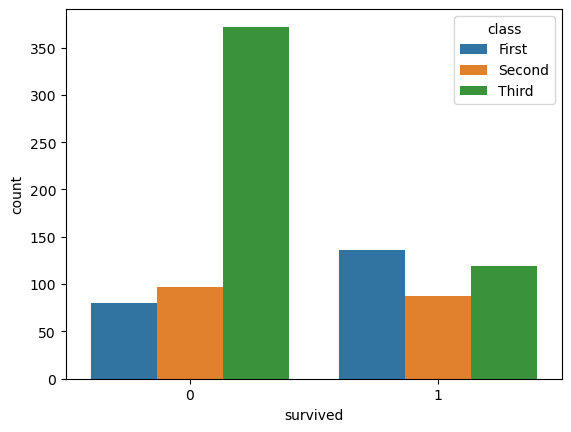

In [144]:
sns.countplot(data=t,x='survived',hue='class')

Survival rate in first class passenger is high than other two class.In third class survival rate is very low

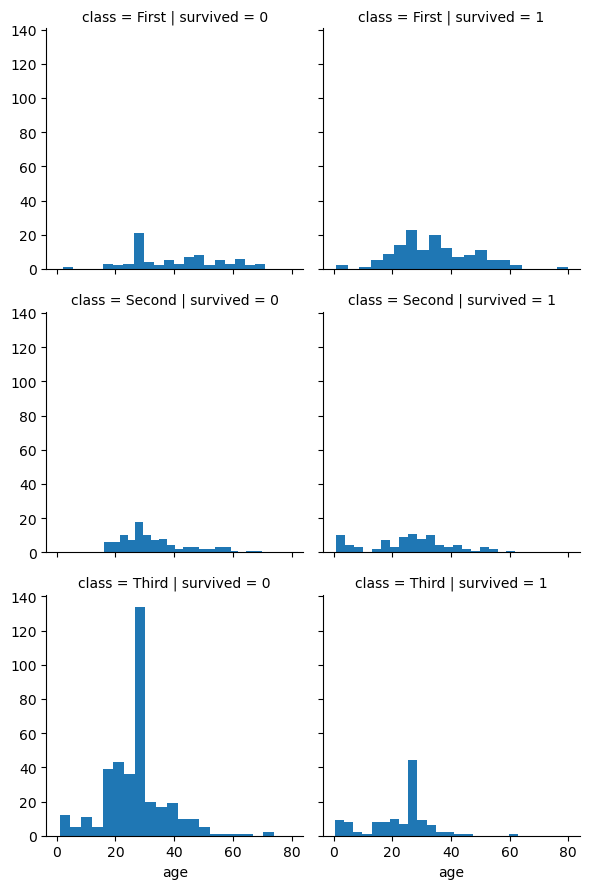

In [154]:
grid = sns.FacetGrid(data=t,col='survived',row='class')
grid.map(plt.hist,'age',bins=20)

In class 3 passenger are not survived more. In 1st class passengers are survived more.

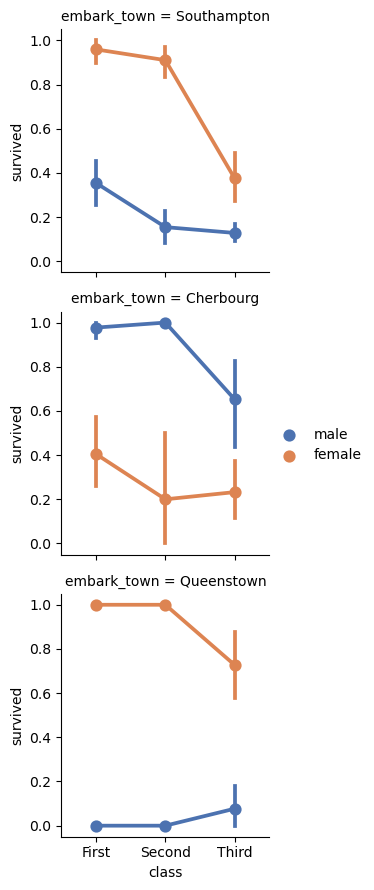

In [157]:
grid2 = sns.FacetGrid(data=t,row='embark_town')
grid2.map(sns.pointplot,'class','survived','sex',palette='deep')
grid2.add_legend()

In cherboug male had higher survival rate than women from this town. For other two town female has more survival rate than men

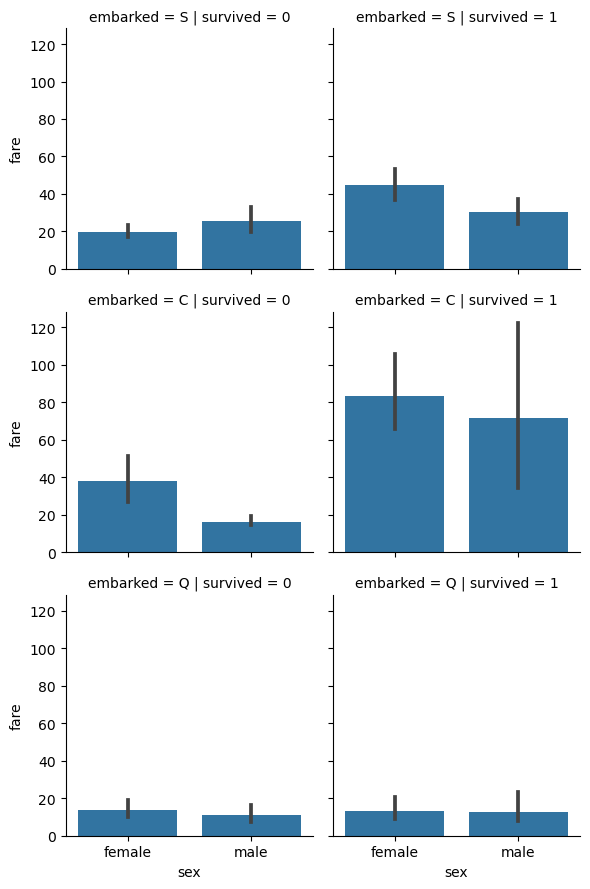

In [159]:
grid3= sns.FacetGrid(data=t,col='survived',row='embarked')
grid3.map(sns.barplot,'sex','fare')

From above we see that passenger paying higher fare are survived.